In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

In [9]:
satFBA_results_no_ATPM=pd.read_csv('../../Analysis/satFBA/out/satFBA_results_no_ATPM.csv').set_index('reaction_id')
satFBA_results_with_ATPM=pd.read_csv('../../Analysis/satFBA/out/satFBA_results_with_ATPM.csv').set_index('reaction_id')

In [10]:
#plotting params
label_fontsize=12
title_fontsize=14

# satFBA plots without ATPM constraints (Optimal Solutions are EFMs)


In [11]:
glucose_concentration_values_no_ATPM=satFBA_results_no_ATPM.loc['GLCptspp','substrate_concentration_mM']

#Growth Rate
biomass_values_no_ATPM=satFBA_results_no_ATPM.loc['Biomass','flux'].values
#Acetate Excretion
acetate_excretion_values_no_ATPM=satFBA_results_no_ATPM.loc['EX_ac_e','flux'].values
#Yield (multiply by 1000 to convert from gDW/mmol to gDW/mo
yield_values_no_ATPM=satFBA_results_no_ATPM.loc['Biomass','yield'].values*1000


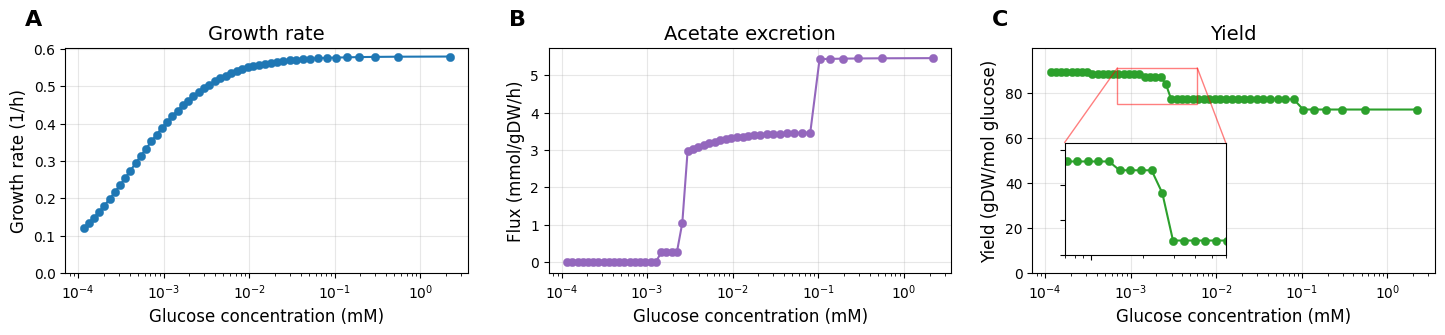

In [19]:
fig,ax=plt.subplots(1,3,figsize=(12,3.5))

#Col 1: Plot Growth rate vs substrate concentration
letters=['A','B','C']
ax[0].plot(glucose_concentration_values_no_ATPM,biomass_values_no_ATPM,'-o',markeredgewidth=0.3,markeredgecolor=None)
ax[0].set_ylabel('Growth rate (1/h)',fontsize=label_fontsize)
#ax[0].tick_params(axis='y')
ax[0].set_xscale('log')
ax[0].set_title('Growth rate',fontsize=title_fontsize)
ax[0].set_xlabel('Glucose concentration (mM)',fontsize=label_fontsize)
ax[00].text(-0.1, 1.1, letters[0], transform=ax[0].transAxes, 
            size=16, weight='bold')
ax[0].set_ylim(0,ax[0].get_ylim()[1])

#Col 2: Plot Acetate excretion vs substrate concentration
ax[1].plot(glucose_concentration_values_no_ATPM,acetate_excretion_values_no_ATPM,'-o',color='tab:purple',markeredgewidth=0.3,markeredgecolor=None)
ax[1].set_xscale('log')
ax[1].set_title('Acetate excretion',fontsize=title_fontsize )
ax[1].set_ylabel('Flux (mmol/gDW/h)',fontsize=label_fontsize)
ax[1].set_xlabel('Glucose concentration (mM)',fontsize=label_fontsize)
ax[1].text(-0.1, 1.1, letters[1], transform=ax[1].transAxes, 
            size=16, weight='bold')
ax[1].set_ylim(-0.3,ax[1].get_ylim()[1])            

#Col 3: Plot Yield vs substrate concentration
ax[2].plot(glucose_concentration_values_no_ATPM,yield_values_no_ATPM,'-o',color='tab:green',markeredgewidth=0.3,markeredgecolor=None)
ax[2].set_xscale('log')
ax[2].set_title('Yield',fontsize=title_fontsize)
ax[2].set_ylabel('Yield (gDW/mol glucose)',fontsize=label_fontsize)
ax[2].set_xlabel('Glucose concentration (mM)',fontsize=label_fontsize)
ax[2].text(-0.1, 1.1, letters[2], transform=ax[2].transAxes, 
            size=16, weight='bold')
ax[2].set_ylim(0,ax[2].get_ylim()[1]+10)
#add grids to all axes
[ax[j].grid(True,alpha=0.3)  for j in range(3)]
plt.tight_layout()
plt.subplots_adjust(right=1.2)

#Inset in the yield plot
# inset Axes....
x1, x2, y1, y2 = 0.0007, 0.006, 75, 91 # subregion of the original image
axins = ax[2].inset_axes(
    [0.08, 0.08,0.4, 0.5],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
axins.plot(glucose_concentration_values_no_ATPM,yield_values_no_ATPM,'-o',color='tab:green',markeredgewidth=0.3,markeredgecolor=None)
axins.set_xscale('log')
axins.xaxis.set_major_formatter(NullFormatter())
axins.xaxis.set_minor_formatter(NullFormatter())
ax[2].indicate_inset_zoom(axins, edgecolor="red")

fig.savefig('../figures/satFBA_results_no_ATPM.pdf',bbox_inches = 'tight')


# satFBA plots with ATPM constraint (optimal solutions are no longer EFMs)

In [13]:
glucose_concentration_values_with_ATPM=satFBA_results_with_ATPM.loc['GLCptspp','substrate_concentration_mM']

#Growth Rate
biomass_values_with_ATPM=satFBA_results_with_ATPM.loc['Biomass','flux'].values
#Acetate Excretion
acetate_excretion_values_with_ATPM=satFBA_results_with_ATPM.loc['EX_ac_e','flux'].values
#Yield (multiply by 1000 to convert from gDW/mmol to gDW/mol)
yield_values_with_ATPM=satFBA_results_with_ATPM.loc['Biomass','yield'].values*1000.0


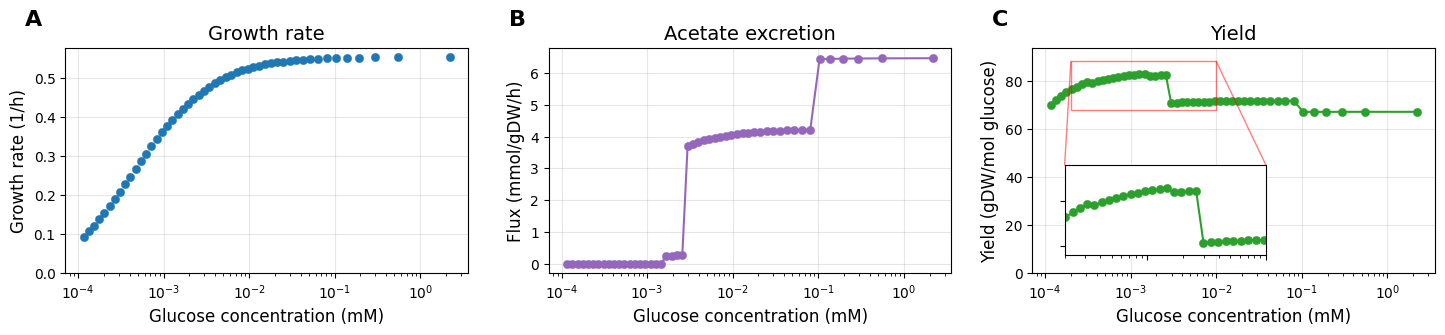

In [20]:
fig,ax=plt.subplots(1,3,figsize=(12,3.5))

#Col 1: Plot Growth rate vs substrate concentration

letters=['A','B','C']
ax[0].plot(glucose_concentration_values_with_ATPM,biomass_values_with_ATPM,'o',markeredgewidth=0.3,markeredgecolor=None)
ax[0].set_ylabel('Growth rate (1/h)',fontsize=label_fontsize)
#ax[0].tick_params(axis='y')
ax[0].set_xscale('log')
ax[0].set_title('Growth rate',fontsize=title_fontsize)
ax[0].set_xlabel('Glucose concentration (mM)',fontsize=label_fontsize)
ax[00].text(-0.1, 1.1, letters[0], transform=ax[0].transAxes, 
            size=16, weight='bold')
ax[0].set_ylim(0,ax[0].get_ylim()[1])

#Col 2: Plot Acetate excretion vs substrate concentration
ax[1].plot(glucose_concentration_values_with_ATPM,acetate_excretion_values_with_ATPM,'-o',color='tab:purple',markeredgewidth=0.3,markeredgecolor=None)
ax[1].set_xscale('log')
ax[1].set_title('Acetate excretion',fontsize=title_fontsize )
ax[1].set_ylabel('Flux (mmol/gDW/h)',fontsize=label_fontsize)
ax[1].set_xlabel('Glucose concentration (mM)',fontsize=label_fontsize)
ax[1].text(-0.1, 1.1, letters[1], transform=ax[1].transAxes, 
            size=16, weight='bold')
ax[1].set_ylim(-0.3,ax[1].get_ylim()[1])            

#Col 3: Plot Yield vs substrate concentration
ax[2].plot(glucose_concentration_values_with_ATPM,yield_values_with_ATPM,'-o',color='tab:green',markeredgewidth=0.3,markeredgecolor=None)
ax[2].set_xscale('log')
ax[2].set_title('Yield',fontsize=title_fontsize)
ax[2].set_ylabel('Yield (gDW/mol glucose)',fontsize=label_fontsize)
ax[2].set_xlabel('Glucose concentration (mM)',fontsize=label_fontsize)
ax[2].text(-0.1, 1.1, letters[2], transform=ax[2].transAxes, 
            size=16, weight='bold')
ax[2].set_ylim(0,ax[2].get_ylim()[1]+10)
#add grids to all axes
[ax[j].grid(True,alpha=0.3)  for j in range(3)]
plt.tight_layout()
plt.subplots_adjust(right=1.2)
#Inset in the yield plot
# inset Axes....
x1, x2, y1, y2 = 2e-4, 1e-2, 68, 88 # subregion of the original image
axins = ax[2].inset_axes(
    [0.08, 0.08,0.5, 0.4],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
axins.plot(glucose_concentration_values_with_ATPM,yield_values_with_ATPM,'-o',color='tab:green',markeredgewidth=0.3,markeredgecolor=None)
axins.set_xscale('log')
axins.xaxis.set_major_formatter(NullFormatter())
axins.xaxis.set_minor_formatter(NullFormatter())
ax[2].indicate_inset_zoom(axins, edgecolor="red")
fig.savefig('../figures/satFBA_results_with_ATPM.pdf',bbox_inches = 'tight')
